# Gate Delay Calculation

* Approximate exponential scaling
* At 80 bpm
  * 1% delay is 7.5ms 
  * 10% delay is 75ms
  * 100% delay is 750ms


max val: 585216 (< 2^32)
T_min = 7.668ms, T_max = 1.95534s


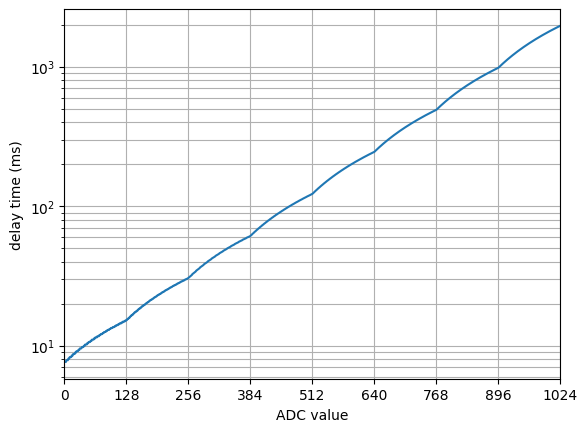

In [30]:
import numpy as np
import matplotlib.pyplot as plt

adc = np.arange(1024)

NLOBITS = 7
MINTICKS = 36

ubits = (adc >> NLOBITS) & 0x7
lbits = adc & 0x7F
kd = np.zeros_like(adc)

kdmax = 0
for i in range(len(adc)):
    kd[i] = 1 << ubits[i] 
    kd[i] *= MINTICKS
    arg = kd[i] * lbits[i]
    if arg > kdmax: kdmax = arg
    kd[i] += arg >> NLOBITS

    #print(f"{i}, {adc[i]}: {kd}")

T = 0.213e-3*kd
print(f"max val: {kdmax} (< 2^32)")
print(f"T_min = {min(T)*1000}ms, T_max = {max(T)}s")
plt.semilogy(adc, T*1000.0)
plt.xlabel("ADC value")
plt.ylabel("delay time (ms)")
plt.grid(True, 'both')
plt.xticks(np.linspace(0,1024,9))
plt.xlim((0,1024))
plt.show()